In [1]:
import arxiv
import matplotlib.pyplot as plt
import math 
import random
from matplotlib.ticker import MaxNLocator

In [2]:
keywords = [
              "%22Stoachastic Gradient Descent%22 OR %22stochastic gradient descent%22 OR %22SGD%22",
              "%22Mini-Batch Gradient Descent%22 OR %22mini-batch gradient descent%22 OR %22Mini Batch Gradient Descent%22 OR %22mini batch gradient descent%22 OR %22MBGD%22",
              "%22Nesterov's Accelerated Gradient%22 OR %22nesterov's accelerated gradient%22 OR %22NAG%22"
              "Adagrad",
              "RMSProp",
              "Adadelta",
              "%22Adaptive Moment Estimation%22 OR %22adaptive moment estimation%22 OR %22Adam%22",
              "AdaMax OR Adamax",
              "Nadam OR NAdam",
              "AdaBound OR Adabound",
              "AdamW OR Adamw",
              "AMSGrad",
              "ND-Adam OR Novograd",
              "%22 RAdam %22 OR %22 Radam %22",
              "%22 Kronecker-factored Approximate Curvature %22 OR K-FAC"
             ]

fields = ["abs", "ti"]
filters = []
categories = ["stat.AP", "stat.CO", "stat.ME", "stat.ML", "stat.OT", "stat.TH", "cs.AI", "cs.CL", "cs.DC", "cs.GL", "cs.GR", "cs.GT", "cs.IR", "cs.IT", "cs.LG", "cs.MA", "cs.NA", "cs.NE", "cs.PF", "cs.LG", "cs.RO"]

In [3]:
def print_timeline(timeline, keyword):
    lists = sorted(timeline.items())
    x, y = zip(*lists)
    x_values = []
    y_values = []
    for x_tic in x:
        x_values.append(int(x_tic))
    for y_tic in y:
        y_values.append(int(y_tic))
        
    fig, ax = plt.subplots()
    ax.set_xticks(x_values)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticklabels(x_values, rotation='vertical')
    ax.bar(x_values, y)
    plt.ylabel('Number of Publications')
    plt.show()
    fig.savefig(keyword + "_hist.pdf", bbox_inches = 'tight')
    

def print_result_sample(results, amount):
    if amount < len(results):
        for i in range(amount):
            sample = random.randint(0, len(results)-1)
            paper = results[sample]["id"]
            print(paper + "\n")
    else:
        for i in range(len(results)):
            paper = results[i]["id"]
            print(paper + "\n")
        
def extract_term(search_key):
    term = search_key.split("OR")[0].replace(" ", "").replace("%22", "")
    return term

    
def construct_query(keyword, fields, categories):
    query = "%28"
    for field in fields:
        if field != fields[0]:
            query += " OR "
        query += field + ":%28" + keyword + "%29 "
    query += "%29 AND %28 cat: %28"
    for category in categories:
        if category != categories[0]:
            query += " OR "
        query += category
        
    query += "%29 %29"
    if len(filters) > 0:
        query += "ANDNOT %28"
        for field in fields:
            if field != fields[0]:
                query += " OR "
            query +=  "%28"
            query += field + ":%28"
            for filter_word in filters:
                if filter_word != filters[0]:
                    query += " OR "
                query +=  filter_word
            query += "%29 %29"
        query += "%29"
    return query


def print_timelines(timelines):
    pass

def organizie_timeline(results, startYear, toYear):
    timeline = {}
    for year in range(startYear, toYear + 1):
        timeline[year] = 0
    
    for paper in results:
        year = int(paper["published"][:4])
        if year >= startYear and year <= toYear:
            timeline[year] = timeline[year] + 1
    
    print("Timeline:", timeline)
    return timeline


def send_query(search_key):
    count = 0
    timeline = {}
    results = []
    new_query = construct_query(search_key, fields, categories)
    term = extract_term(search_key)
    while True:
        result = arxiv.query(query=new_query, sort_by= "submittedDate", sort_order="ascending", max_results=100, start=count, prune=False)
        
        if len(result) == 0:
            print("\n" + "#############################")
            print("Final number of results for query (" + term + "):", count)
            timeline = organizie_timeline(results, startYear=2000, toYear=2019)
            print_timeline(timeline, term)
            print_result_sample(results, 5)
            print("#############################" + "\n")
            return timeline
        
        results.extend(result)
        count += len(result)
        print("Currently the query for " + term + " is at:", count)

Currently the query for StoachasticGradientDescent is at: 100
Currently the query for StoachasticGradientDescent is at: 200
Currently the query for StoachasticGradientDescent is at: 300
Currently the query for StoachasticGradientDescent is at: 400
Currently the query for StoachasticGradientDescent is at: 500
Currently the query for StoachasticGradientDescent is at: 600
Currently the query for StoachasticGradientDescent is at: 700
Currently the query for StoachasticGradientDescent is at: 800
Currently the query for StoachasticGradientDescent is at: 900
Currently the query for StoachasticGradientDescent is at: 1000
Currently the query for StoachasticGradientDescent is at: 1100
Currently the query for StoachasticGradientDescent is at: 1200
Currently the query for StoachasticGradientDescent is at: 1212

#############################
Final number of results for query (StoachasticGradientDescent): 1212
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0

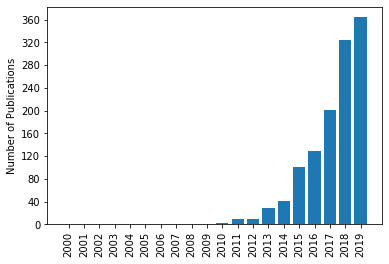

http://arxiv.org/abs/1902.03187v2

http://arxiv.org/abs/1810.11614v2

http://arxiv.org/abs/1909.10802v2

http://arxiv.org/abs/1802.03801v2

http://arxiv.org/abs/1806.07353v1

#############################

Currently the query for Mini-BatchGradientDescent is at: 13

#############################
Final number of results for query (Mini-BatchGradientDescent): 13
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 2, 2018: 3, 2019: 8}


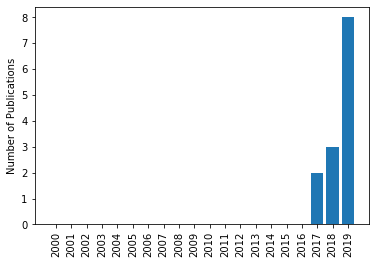

http://arxiv.org/abs/1908.00636v1

http://arxiv.org/abs/1711.06424v3

http://arxiv.org/abs/1906.08771v1

http://arxiv.org/abs/1906.08771v1

http://arxiv.org/abs/1812.06613v1

#############################

Currently the query for Nesterov'sAcceleratedGradient is at: 100
Currently the query for Nesterov'sAcceleratedGradient is at: 101

#############################
Final number of results for query (Nesterov'sAcceleratedGradient): 101
Timeline: {2000: 0, 2001: 0, 2002: 1, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 1, 2011: 0, 2012: 1, 2013: 3, 2014: 2, 2015: 8, 2016: 6, 2017: 19, 2018: 28, 2019: 32}


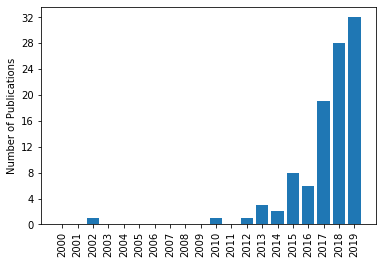

http://arxiv.org/abs/1810.09061v1

http://arxiv.org/abs/1507.06239v1

http://arxiv.org/abs/1810.01066v2

http://arxiv.org/abs/1804.05484v3

http://arxiv.org/abs/1906.03559v1

#############################

Currently the query for RMSProp is at: 48

#############################
Final number of results for query (RMSProp): 48
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 3, 2016: 3, 2017: 13, 2018: 12, 2019: 17}


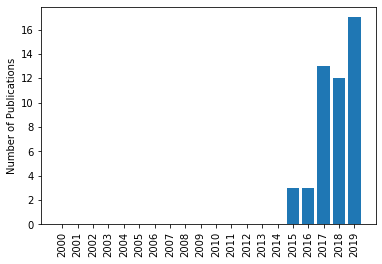

http://arxiv.org/abs/1705.08292v2

http://arxiv.org/abs/1712.07628v1

http://arxiv.org/abs/1706.05507v2

http://arxiv.org/abs/1908.03265v1

http://arxiv.org/abs/1708.01911v1

#############################

Currently the query for Adadelta is at: 9

#############################
Final number of results for query (Adadelta): 9
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 1, 2013: 0, 2014: 1, 2015: 2, 2016: 0, 2017: 1, 2018: 2, 2019: 2}


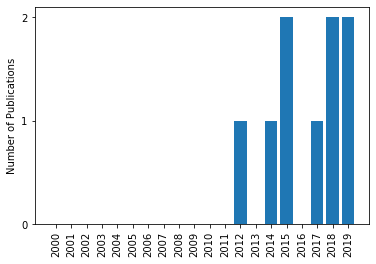

http://arxiv.org/abs/1808.05160v2

http://arxiv.org/abs/1511.01158v3

http://arxiv.org/abs/1804.04235v1

http://arxiv.org/abs/1212.5701v1

http://arxiv.org/abs/1808.05160v2

#############################

Currently the query for AdaptiveMomentEstimation is at: 100
Currently the query for AdaptiveMomentEstimation is at: 195

#############################
Final number of results for query (AdaptiveMomentEstimation): 195
Timeline: {2000: 0, 2001: 0, 2002: 1, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 3, 2009: 1, 2010: 1, 2011: 2, 2012: 1, 2013: 5, 2014: 5, 2015: 12, 2016: 12, 2017: 34, 2018: 48, 2019: 70}


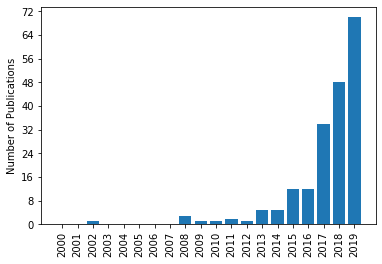

http://arxiv.org/abs/1811.03679v2

http://arxiv.org/abs/1708.02188v1

http://arxiv.org/abs/1607.03183v1

http://arxiv.org/abs/1611.01600v3

http://arxiv.org/abs/1901.09109v6

#############################

Currently the query for AdaMax is at: 3

#############################
Final number of results for query (AdaMax): 3
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 1, 2015: 1, 2016: 0, 2017: 0, 2018: 1, 2019: 0}


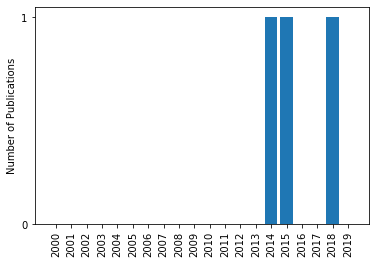

http://arxiv.org/abs/1412.6980v9

http://arxiv.org/abs/1511.01158v3

http://arxiv.org/abs/1808.05160v2

#############################

Currently the query for Nadam is at: 3

#############################
Final number of results for query (Nadam): 3
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 1, 2019: 2}


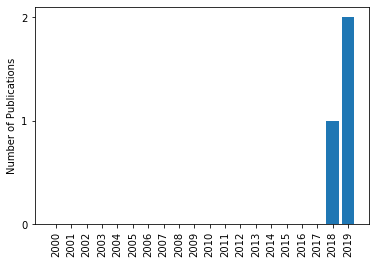

http://arxiv.org/abs/1808.03408v3

http://arxiv.org/abs/1904.09237v1

http://arxiv.org/abs/1905.01422v5

#############################

Currently the query for AdaBound is at: 3

#############################
Final number of results for query (AdaBound): 3
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 3}


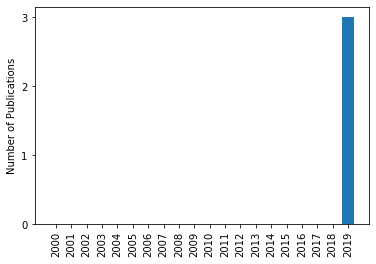

http://arxiv.org/abs/1902.09843v1

http://arxiv.org/abs/1903.10951v3

http://arxiv.org/abs/1908.04457v1

#############################

Currently the query for AdamW is at: 3

#############################
Final number of results for query (AdamW): 3
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 1, 2018: 1, 2019: 1}


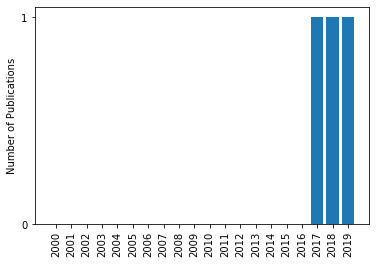

http://arxiv.org/abs/1711.05101v3

http://arxiv.org/abs/1807.07540v4

http://arxiv.org/abs/1905.11286v2

#############################

Currently the query for AMSGrad is at: 15

#############################
Final number of results for query (AMSGrad): 15
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 7, 2019: 8}


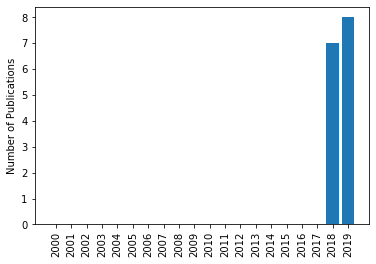

http://arxiv.org/abs/1904.03590v3

http://arxiv.org/abs/1808.05671v2

http://arxiv.org/abs/1808.05671v2

http://arxiv.org/abs/1909.11015v1

http://arxiv.org/abs/1904.03590v3

#############################

Currently the query for ND-Adam is at: 2

#############################
Final number of results for query (ND-Adam): 2
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 2}


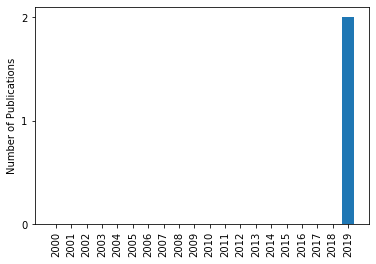

http://arxiv.org/abs/1904.03288v3

http://arxiv.org/abs/1905.11286v2

#############################

Currently the query for RAdam is at: 2

#############################
Final number of results for query (RAdam): 2
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 2}


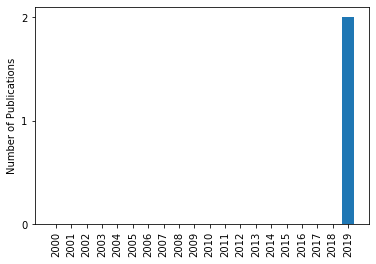

http://arxiv.org/abs/1908.03265v1

http://arxiv.org/abs/1910.04209v1

#############################

Currently the query for Kronecker-factoredApproximateCurvature is at: 12

#############################
Final number of results for query (Kronecker-factoredApproximateCurvature): 12
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 2, 2016: 1, 2017: 2, 2018: 4, 2019: 3}


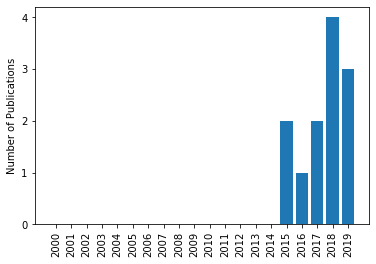

http://arxiv.org/abs/1708.05144v2

http://arxiv.org/abs/1511.01169v5

http://arxiv.org/abs/1712.02390v2

http://arxiv.org/abs/1811.12565v1

http://arxiv.org/abs/1712.02390v2

#############################



In [4]:
timelines = []
for algorithm in keywords:
    timeline = send_query(algorithm)
    timelines.append(timeline)

print_timelines(timelines)